In [1]:
import requests
from config import api_key
import time
import pandas as pd
pd.set_option('display.max_columns', None)
from time import sleep
import numpy as np

In [2]:
from bs4 import BeautifulSoup 

# Extract IMDB Dataset

In [3]:
url2 = 'https://www.imdb.com/chart/bottom'
response = requests.get(url2)
soup = BeautifulSoup(response.content, 'html.parser')

In [4]:
print(soup)


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<style>
                body#styleguide-v2 {
                    background: no-repeat fixed center top #000;
                }
            </style>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>IMDb Bottom 100 - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    

In [5]:
scraped_movies = soup.find_all('td', class_='titleColumn')
scraped_movies

[<td class="titleColumn">
       1.
       <a href="/title/tt1213644/" title="Jason Friedberg (dir.), Carmen Electra, Vanessa Lachey">Disaster Movie</a>
 <span class="secondaryInfo">(2008)</span>
 </td>,
 <td class="titleColumn">
       2.
       <a href="/title/tt0270846/" title="Bob Clark (dir.), Jon Voight, Scott Baio">Superbabies: Baby Geniuses 2</a>
 <span class="secondaryInfo">(2004)</span>
 </td>,
 <td class="titleColumn">
       3.
       <a href="/title/tt0060666/" title="Harold P. Warren (dir.), Tom Neyman, John Reynolds">Manos: The Hands of Fate</a>
 <span class="secondaryInfo">(1966)</span>
 </td>,
 <td class="titleColumn">
       4.
       <a href="/title/tt4458206/" title="Celal Çimen (dir.), Cem Kurtoglu, Hakan Ural">Code Name: K.O.Z.</a>
 <span class="secondaryInfo">(2015)</span>
 </td>,
 <td class="titleColumn">
       5.
       <a href="/title/tt4009460/" title="Darren Doane (dir.), Kirk Cameron, Darren Doane">Kirk Cameron's Saving Christmas</a>
 <span class="secondar

In [6]:
movies = []
for movie in scraped_movies:
    movie = movie.get_text().replace('\n', "")
    movie = movie.strip(" ")
    movies.append(movie)
movies

['1.      Disaster Movie(2008)',
 '2.      Superbabies: Baby Geniuses 2(2004)',
 '3.      Manos: The Hands of Fate(1966)',
 '4.      Code Name: K.O.Z.(2015)',
 "5.      Kirk Cameron's Saving Christmas(2014)",
 '6.      Birdemic: Shock and Terror(2010)',
 '7.      The Hottie & the Nottie(2008)',
 '8.      House of the Dead(2003)',
 '9.      Pledge This!(2006)',
 '10.      Son of the Mask(2005)',
 '11.      Radhe(2021)',
 '12.      Turks in Space(2006)',
 '13.      Epic Movie(2007)',
 '14.      Foodfight!(2012)',
 '15.      Race 3(2018)',
 '16.      Daniel the Wizard(2004)',
 '17.      From Justin to Kelly(2003)',
 '18.      Going Overboard(1989)',
 '19.      Alone in the Dark(2005)',
 '20.      Battlefield Earth(2000)',
 '21.      Dragonball Evolution(2009)',
 '22.      Gigli(2003)',
 '23.      Glitter(2001)',
 '24.      Coolie No. 1(2020)',
 '25.      Meet the Spartans(2008)',
 '26.      Enes Batur(2018)',
 '27.      Cats(2019)',
 '28.      Date Movie(2006)',
 '29.      Baby Geniuses(1

In [7]:
scraped_ratings = soup.find_all('td', class_='ratingColumn imdbRating')
scraped_ratings

[<td class="ratingColumn imdbRating">
 <strong title="2.0 based on 89,362 user ratings">2.0</strong>
 </td>,
 <td class="ratingColumn imdbRating">
 <strong title="2.1 based on 30,637 user ratings">2.1</strong>
 </td>,
 <td class="ratingColumn imdbRating">
 <strong title="2.1 based on 35,618 user ratings">2.1</strong>
 </td>,
 <td class="ratingColumn imdbRating">
 <strong title="2.1 based on 27,485 user ratings">2.1</strong>
 </td>,
 <td class="ratingColumn imdbRating">
 <strong title="2.1 based on 15,538 user ratings">2.1</strong>
 </td>,
 <td class="ratingColumn imdbRating">
 <strong title="2.1 based on 22,429 user ratings">2.1</strong>
 </td>,
 <td class="ratingColumn imdbRating">
 <strong title="2.2 based on 37,938 user ratings">2.2</strong>
 </td>,
 <td class="ratingColumn imdbRating">
 <strong title="2.3 based on 36,777 user ratings">2.3</strong>
 </td>,
 <td class="ratingColumn imdbRating">
 <strong title="2.3 based on 18,193 user ratings">2.3</strong>
 </td>,
 <td class="ratingC

In [8]:
ratings = []
for rating in scraped_ratings:
    rating = rating.get_text().replace('\n', '')
    ratings.append(rating)
ratings

['2.0',
 '2.1',
 '2.1',
 '2.1',
 '2.1',
 '2.1',
 '2.2',
 '2.3',
 '2.3',
 '2.4',
 '2.4',
 '2.4',
 '2.5',
 '2.5',
 '2.5',
 '2.6',
 '2.6',
 '2.6',
 '2.6',
 '2.6',
 '2.6',
 '2.7',
 '2.8',
 '2.8',
 '2.9',
 '2.9',
 '2.9',
 '2.9',
 '2.9',
 '3.0',
 '3.0',
 '3.1',
 '3.1',
 '3.1',
 '3.2',
 '3.2',
 '3.2',
 '3.2',
 '3.3',
 '3.3',
 '3.3',
 '3.3',
 '3.3',
 '3.3',
 '3.3',
 '3.3',
 '3.4',
 '3.4',
 '3.4',
 '3.4',
 '3.4',
 '3.5',
 '3.5',
 '3.5',
 '3.5',
 '3.5',
 '3.5',
 '3.5',
 '3.5',
 '3.6',
 '3.6',
 '3.6',
 '3.6',
 '3.6',
 '3.6',
 '3.7',
 '3.7',
 '3.7',
 '3.7',
 '3.7',
 '3.7',
 '3.7',
 '3.7',
 '3.7',
 '3.7',
 '3.7',
 '3.7',
 '3.8',
 '3.8',
 '3.8',
 '3.8',
 '3.8',
 '3.8',
 '3.8',
 '3.8',
 '3.8',
 '3.8',
 '3.8',
 '3.8',
 '3.8',
 '3.8',
 '3.8',
 '3.9',
 '3.9',
 '3.9',
 '3.9',
 '3.9',
 '3.9',
 '3.9',
 '3.9']

In [9]:
scraped_ids = soup.find_all('td', class_='watchlistColumn')
scraped_ids

[<td class="watchlistColumn">
 <div class="wlb_ribbon" data-recordmetrics="true" data-tconst="tt1213644"></div>
 </td>,
 <td class="watchlistColumn">
 <div class="wlb_ribbon" data-recordmetrics="true" data-tconst="tt0270846"></div>
 </td>,
 <td class="watchlistColumn">
 <div class="wlb_ribbon" data-recordmetrics="true" data-tconst="tt0060666"></div>
 </td>,
 <td class="watchlistColumn">
 <div class="wlb_ribbon" data-recordmetrics="true" data-tconst="tt4458206"></div>
 </td>,
 <td class="watchlistColumn">
 <div class="wlb_ribbon" data-recordmetrics="true" data-tconst="tt4009460"></div>
 </td>,
 <td class="watchlistColumn">
 <div class="wlb_ribbon" data-recordmetrics="true" data-tconst="tt1316037"></div>
 </td>,
 <td class="watchlistColumn">
 <div class="wlb_ribbon" data-recordmetrics="true" data-tconst="tt0804492"></div>
 </td>,
 <td class="watchlistColumn">
 <div class="wlb_ribbon" data-recordmetrics="true" data-tconst="tt0317676"></div>
 </td>,
 <td class="watchlistColumn">
 <div clas

In [10]:
ids = []
for id_html in scraped_ids:
    id_title = id_html.find("div")["data-tconst"]
    ids.append(id_title)
ids

['tt1213644',
 'tt0270846',
 'tt0060666',
 'tt4458206',
 'tt4009460',
 'tt1316037',
 'tt0804492',
 'tt0317676',
 'tt0417056',
 'tt0362165',
 'tt10888594',
 'tt0808240',
 'tt0799949',
 'tt0249516',
 'tt7431594',
 'tt0421051',
 'tt0339034',
 'tt0096870',
 'tt0369226',
 'tt0185183',
 'tt1098327',
 'tt0299930',
 'tt0118589',
 'tt10280276',
 'tt1073498',
 'tt7668842',
 'tt5697572',
 'tt0466342',
 'tt0118665',
 'tt0089280',
 'tt0785077',
 'tt1883367',
 'tt0093300',
 'tt0383222',
 'tt0105643',
 'tt6038600',
 'tt1572311',
 'tt2467046',
 'tt0058548',
 'tt7255568',
 'tt0116756',
 'tt2574698',
 'tt10886166',
 'tt0246894',
 'tt0120207',
 'tt0810913',
 'tt10350922',
 'tt5690360',
 'tt0327554',
 'tt4877122',
 'tt2403029',
 'tt7608028',
 'tt1666186',
 'tt0462244',
 'tt8366590',
 'tt5013984',
 'tt0400426',
 'tt0118539',
 'tt0804452',
 'tt0115624',
 'tt0110978',
 'tt0329028',
 'tt0065832',
 'tt0295427',
 'tt0795461',
 'tt0295254',
 'tt1411664',
 'tt9820556',
 'tt1517489',
 'tt0103923',
 'tt0110647',
 '

In [11]:
# movie_DF = pd.DataFrame({'Movies': movies, 
#                          'Movie Rating': ratings,
#                         'Movie ID': ids})

movie_DF = pd.DataFrame({'Movie ID': ids, 
                         'Movies': movies,
                        'Movie Rating': ratings})


In [12]:
movie_DF

,Movie ID,Movies,Movie Rating
0,tt1213644,1. Disaster Movie(2008),2.0
1,tt0270846,2. Superbabies: Baby Geniuses 2(2004),2.1
2,tt0060666,3. Manos: The Hands of Fate(1966),2.1
3,tt4458206,4. Code Name: K.O.Z.(2015),2.1
4,tt4009460,5. Kirk Cameron's Saving Christmas(2014),2.1
...,...,...,...
95,tt0891592,96. Street Fighter: The Legend of Chun-Li...,3.9
96,tt1185266,97. Stan Helsing(2009),3.9
97,tt0460780,98. In the Name of the King: A Dungeon Si...,3.9
98,tt1530509,99. The Human Centipede II (Full Sequence...,3.9


In [13]:
split_rank = movie_DF['Movies'].str.split('.', n=1, expand=True).rename(columns={0:"Rank", 1:"Movies"})
split_rank

,Rank,Movies
0,1,Disaster Movie(2008)
1,2,Superbabies: Baby Geniuses 2(2004)
2,3,Manos: The Hands of Fate(1966)
3,4,Code Name: K.O.Z.(2015)
4,5,Kirk Cameron's Saving Christmas(2014)
...,...,...
95,96,Street Fighter: The Legend of Chun-Li(2009)
96,97,Stan Helsing(2009)
97,98,In the Name of the King: A Dungeon Siege...
98,99,The Human Centipede II (Full Sequence)(2...


In [14]:
split_rank3 =split_rank['Movies'].str.extract('(.*)\((\d{4})\)', expand=False).rename(columns={0:"Movies", 1:"Year"})
split_rank3


,Movies,Year
0,Disaster Movie,2008
1,Superbabies: Baby Geniuses 2,2004
2,Manos: The Hands of Fate,1966
3,Code Name: K.O.Z.,2015
4,Kirk Cameron's Saving Christmas,2014
...,...,...
95,Street Fighter: The Legend of Chun-Li,2009
96,Stan Helsing,2009
97,In the Name of the King: A Dungeon Siege...,2007
98,The Human Centipede II (Full Sequence),2011


In [15]:
split_rank3["Rank"]=split_rank["Rank"]
split_rank3["Movie Rating"]=movie_DF["Movie Rating"]
split_rank3["Movie ID"]=movie_DF["Movie ID"]

split_rank3

,Movies,Year,Rank,Movie Rating,Movie ID
0,Disaster Movie,2008,1,2.0,tt1213644
1,Superbabies: Baby Geniuses 2,2004,2,2.1,tt0270846
2,Manos: The Hands of Fate,1966,3,2.1,tt0060666
3,Code Name: K.O.Z.,2015,4,2.1,tt4458206
4,Kirk Cameron's Saving Christmas,2014,5,2.1,tt4009460
...,...,...,...,...,...
95,Street Fighter: The Legend of Chun-Li,2009,96,3.9,tt0891592
96,Stan Helsing,2009,97,3.9,tt1185266
97,In the Name of the King: A Dungeon Siege...,2007,98,3.9,tt0460780
98,The Human Centipede II (Full Sequence),2011,99,3.9,tt1530509


# Extract OMDB

from pprint import pprint

In [16]:
url = "http://www.omdbapi.com/?apikey=" + api_key + "&i="


movies = ['tt1213644',
 'tt0270846',
 'tt0060666',
 'tt4458206',
 'tt4009460',
 'tt1316037',
 'tt0804492',
 'tt0317676',
 'tt0417056',
 'tt0362165',
 'tt10888594',
 'tt0808240',
 'tt0799949',
 'tt0249516',
 'tt7431594',
 'tt0421051',
 'tt0339034',
 'tt0096870',
 'tt0369226',
 'tt0185183',
 'tt1098327',
 'tt0299930',
 'tt0118589',
 'tt10280276',
 'tt1073498',
 'tt7668842',
 'tt5697572',
 'tt0466342',
 'tt0118665',
 'tt0089280',
 'tt0785077',
 'tt1883367',
 'tt0093300',
 'tt0383222',
 'tt0105643',
 'tt6038600',
 'tt1572311',
 'tt2467046',
 'tt0058548',
 'tt7255568',
 'tt2574698',
 'tt0116756',
 'tt10886166',
 'tt0246894',
 'tt0120207',
 'tt0810913',
 'tt10350922',
 'tt5690360',
 'tt0327554',
 'tt4877122',
 'tt2403029',
 'tt7608028',
 'tt1666186',
 'tt0462244',
 'tt8366590',
 'tt5013984',
 'tt0400426',
 'tt0118539',
 'tt0804452',
 'tt0115624',
 'tt0110978',
 'tt0329028',
 'tt0065832',
 'tt0295427',
 'tt0795461',
 'tt0295254',
 'tt1411664',
 'tt9820556',
 'tt1517489',
 'tt0103923',
 'tt0110647',
 'tt0120185',
 'tt0110857',
 'tt0275022',
 'tt0368226',
 'tt4667094',
 'tt7059844',
 'tt10481868',
 'tt0119707',
 'tt0372873',
 'tt0085750',
 'tt0095560',
 'tt0118688',
 'tt0897361',
 'tt0424774',
 'tt0450345',
 'tt0094074',
 'tt0432291',
 'tt0190374',
 'tt1714203',
 'tt0094118',
 'tt6439558',
 'tt3138104',
 'tt0158622',
 'tt0811138',
 'tt0891592',
 'tt1185266',
 'tt0460780',
 'tt1530509',
 'tt1231277']


In [17]:
response = requests.get(url)
print(response.status_code)

200


In [36]:
title = []
year = []
imddrate = []
rate = []
genre = []
actor = []
gross = []
director = []


for movie_title in movies:
    
    try: 
        
        print(movie_title)
        full_url = url + movie_title
        response = requests.get(full_url)

        time.sleep(1)
        

        if response.status_code == 200:    
            data = response.json()

            title.append(data["Title"])
            year.append(data["Year"])
            imddrate.append(data["imdbRating"])
            rate.append(data["Rated"])
            genre.append(data["Genre"])
            actor.append(data["Actors"])
            gross.append(data["BoxOffice"])
            director.append(data["Director"])
#             count += 1

    except Exception:
            title.append(np.nan)
            year.append(np.nan)
            imddrate.append(np.nan)
            rate.append(np.nan)
            genre.append(np.nan)
            actor.append(np.nan)
            gross.append(np.nan)
            director.append(np.nan)
#             count += 1
#             print("City not found. Skipping...")

tt1213644
tt0270846
tt0060666
tt4458206
tt4009460
tt1316037
tt0804492
tt0317676
tt0417056
tt0362165
tt10888594
tt0808240
tt0799949
tt0249516
tt7431594
tt0421051
tt0339034
tt0096870
tt0369226
tt0185183
tt1098327
tt0299930
tt0118589
tt10280276
tt1073498
tt7668842
tt5697572
tt0466342
tt0118665
tt0089280
tt0785077
tt1883367
tt0093300
tt0383222
tt0105643
tt6038600
tt1572311
tt2467046
tt0058548
tt7255568
tt2574698
tt0116756
tt10886166
tt0246894
tt0120207
tt0810913
tt10350922
tt5690360
tt0327554
tt4877122
tt2403029
tt7608028
tt1666186
tt0462244
tt8366590
tt5013984
tt0400426
tt0118539
tt0804452
tt0115624
tt0110978
tt0329028
tt0065832
tt0295427
tt0795461
tt0295254
tt1411664
tt9820556
tt1517489
tt0103923
tt0110647
tt0120185
tt0110857
tt0275022
tt0368226
tt4667094
tt7059844
tt10481868
tt0119707
tt0372873
tt0085750
tt0095560
tt0118688
tt0897361
tt0424774
tt0450345
tt0094074
tt0432291
tt0190374
tt1714203
tt0094118
tt6439558
tt3138104
tt0158622
tt0811138
tt0891592
tt1185266
tt0460780
tt1530509
tt123

In [37]:
df = pd.DataFrame()
df["Movies"] = title
df["Movie ID"] = movies
df["IMDB Rating"] = imddrate
df["Genre"] = genre
df["Rated"] = rate
df["Actors"] = actor
df["Directors"] = director
df["Gross"] = gross

df

,Movies,Movie ID,IMDB Rating,Genre,Rated,Actors,Directors,Gross
0,Disaster Movie,tt1213644,1.9,"Comedy, Sci-Fi",PG-13,"Carmen Electra, Vanessa Lachey, Nicole Parker","Jason Friedberg, Aaron Seltzer","$14,190,901"
1,Superbabies: Baby Geniuses 2,tt0270846,1.9,"Comedy, Family, Sci-Fi",PG,"Jon Voight, Scott Baio, Vanessa Angel",Bob Clark,"$9,219,388"
2,Manos: The Hands of Fate,tt0060666,1.8,"Drama, Horror",Not Rated,"Tom Neyman, John Reynolds, Diane Adelson",Harold P. Warren,N/A
3,Kod Adi K.O.Z.,tt4458206,2.0,"Crime, Mystery",Not Rated,"Cem Kurtoglu, Hakan Ural, Hazim Körmükcü",Celal Çimen,N/A
4,Saving Christmas,tt4009460,1.4,"Comedy, Family",PG,"Kirk Cameron, Darren Doane, Bridgette Cameron",Darren Doane,"$2,783,970"
...,...,...,...,...,...,...,...,...
95,Street Fighter: The Legend of Chun-Li,tt0891592,3.7,"Action, Crime, Fantasy",PG-13,"Kristin Kreuk, Neal McDonough, Michael Clarke ...",Andrzej Bartkowiak,"$8,742,261"
96,Stan Helsing,tt1185266,3.6,"Comedy, Fantasy, Horror",R,"Steve Howey, Diora Baird, Kenan Thompson",Bo Zenga,N/A
97,In the Name of the King: A Dungeon Siege Tale,tt0460780,3.8,"Action, Adventure, Fantasy",PG-13,"Jason Statham, Ron Perlman, Ray Liotta",Uwe Boll,"$4,775,656"
98,The Human Centipede II (Full Sequence),tt1530509,3.8,Horror,Not Rated,"Laurence R. Harvey, Ashlynn Yennie, Maddi Black",Tom Six,"$141,877"


# Transforming/ Merging Dataset

In [38]:
merged = pd.merge(split_rank3,df, on=["Movie ID"],how="outer")
merged

,Movies_x,Year,Rank,Movie Rating,Movie ID,Movies_y,IMDB Rating,Genre,Rated,Actors,Directors,Gross
0,Disaster Movie,2008,1,2.0,tt1213644,Disaster Movie,1.9,"Comedy, Sci-Fi",PG-13,"Carmen Electra, Vanessa Lachey, Nicole Parker","Jason Friedberg, Aaron Seltzer","$14,190,901"
1,Superbabies: Baby Geniuses 2,2004,2,2.1,tt0270846,Superbabies: Baby Geniuses 2,1.9,"Comedy, Family, Sci-Fi",PG,"Jon Voight, Scott Baio, Vanessa Angel",Bob Clark,"$9,219,388"
2,Manos: The Hands of Fate,1966,3,2.1,tt0060666,Manos: The Hands of Fate,1.8,"Drama, Horror",Not Rated,"Tom Neyman, John Reynolds, Diane Adelson",Harold P. Warren,N/A
3,Code Name: K.O.Z.,2015,4,2.1,tt4458206,Kod Adi K.O.Z.,2.0,"Crime, Mystery",Not Rated,"Cem Kurtoglu, Hakan Ural, Hazim Körmükcü",Celal Çimen,N/A
4,Kirk Cameron's Saving Christmas,2014,5,2.1,tt4009460,Saving Christmas,1.4,"Comedy, Family",PG,"Kirk Cameron, Darren Doane, Bridgette Cameron",Darren Doane,"$2,783,970"
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Street Fighter: The Legend of Chun-Li,2009,96,3.9,tt0891592,Street Fighter: The Legend of Chun-Li,3.7,"Action, Crime, Fantasy",PG-13,"Kristin Kreuk, Neal McDonough, Michael Clarke ...",Andrzej Bartkowiak,"$8,742,261"
96,Stan Helsing,2009,97,3.9,tt1185266,Stan Helsing,3.6,"Comedy, Fantasy, Horror",R,"Steve Howey, Diora Baird, Kenan Thompson",Bo Zenga,N/A
97,In the Name of the King: A Dungeon Siege...,2007,98,3.9,tt0460780,In the Name of the King: A Dungeon Siege Tale,3.8,"Action, Adventure, Fantasy",PG-13,"Jason Statham, Ron Perlman, Ray Liotta",Uwe Boll,"$4,775,656"
98,The Human Centipede II (Full Sequence),2011,99,3.9,tt1530509,The Human Centipede II (Full Sequence),3.8,Horror,Not Rated,"Laurence R. Harvey, Ashlynn Yennie, Maddi Black",Tom Six,"$141,877"


In [39]:
mask = merged.drop(columns=['Movies_y', 'IMDB Rating'])
mask

,Movies_x,Year,Rank,Movie Rating,Movie ID,Genre,Rated,Actors,Directors,Gross
0,Disaster Movie,2008,1,2.0,tt1213644,"Comedy, Sci-Fi",PG-13,"Carmen Electra, Vanessa Lachey, Nicole Parker","Jason Friedberg, Aaron Seltzer","$14,190,901"
1,Superbabies: Baby Geniuses 2,2004,2,2.1,tt0270846,"Comedy, Family, Sci-Fi",PG,"Jon Voight, Scott Baio, Vanessa Angel",Bob Clark,"$9,219,388"
2,Manos: The Hands of Fate,1966,3,2.1,tt0060666,"Drama, Horror",Not Rated,"Tom Neyman, John Reynolds, Diane Adelson",Harold P. Warren,N/A
3,Code Name: K.O.Z.,2015,4,2.1,tt4458206,"Crime, Mystery",Not Rated,"Cem Kurtoglu, Hakan Ural, Hazim Körmükcü",Celal Çimen,N/A
4,Kirk Cameron's Saving Christmas,2014,5,2.1,tt4009460,"Comedy, Family",PG,"Kirk Cameron, Darren Doane, Bridgette Cameron",Darren Doane,"$2,783,970"
...,...,...,...,...,...,...,...,...,...,...
95,Street Fighter: The Legend of Chun-Li,2009,96,3.9,tt0891592,"Action, Crime, Fantasy",PG-13,"Kristin Kreuk, Neal McDonough, Michael Clarke ...",Andrzej Bartkowiak,"$8,742,261"
96,Stan Helsing,2009,97,3.9,tt1185266,"Comedy, Fantasy, Horror",R,"Steve Howey, Diora Baird, Kenan Thompson",Bo Zenga,N/A
97,In the Name of the King: A Dungeon Siege...,2007,98,3.9,tt0460780,"Action, Adventure, Fantasy",PG-13,"Jason Statham, Ron Perlman, Ray Liotta",Uwe Boll,"$4,775,656"
98,The Human Centipede II (Full Sequence),2011,99,3.9,tt1530509,Horror,Not Rated,"Laurence R. Harvey, Ashlynn Yennie, Maddi Black",Tom Six,"$141,877"


In [160]:
# Renaming Movie column
Rename_df = mask.rename(columns={'Movies_x': 'movies', "Movie ID": "movie_id", "Movie Rating": "movie_rating", "Year": "year",
                                "Rank": "rank", "Genre": "genre", "Rated": "rated", "Actors": "actors", "Directors": "director",
                                "Gross": "gross"})
Rename_df

,movies,year,rank,movie_rating,movie_id,genre,rated,actors,director,gross
0,Disaster Movie,2008,1,2.0,tt1213644,"Comedy, Sci-Fi",PG-13,"Carmen Electra, Vanessa Lachey, Nicole Parker","Jason Friedberg, Aaron Seltzer","$14,190,901"
1,Superbabies: Baby Geniuses 2,2004,2,2.1,tt0270846,"Comedy, Family, Sci-Fi",PG,"Jon Voight, Scott Baio, Vanessa Angel",Bob Clark,"$9,219,388"
2,Manos: The Hands of Fate,1966,3,2.1,tt0060666,"Drama, Horror",Not Rated,"Tom Neyman, John Reynolds, Diane Adelson",Harold P. Warren,N/A
3,Code Name: K.O.Z.,2015,4,2.1,tt4458206,"Crime, Mystery",Not Rated,"Cem Kurtoglu, Hakan Ural, Hazim Körmükcü",Celal Çimen,N/A
4,Kirk Cameron's Saving Christmas,2014,5,2.1,tt4009460,"Comedy, Family",PG,"Kirk Cameron, Darren Doane, Bridgette Cameron",Darren Doane,"$2,783,970"
...,...,...,...,...,...,...,...,...,...,...
95,Street Fighter: The Legend of Chun-Li,2009,96,3.9,tt0891592,"Action, Crime, Fantasy",PG-13,"Kristin Kreuk, Neal McDonough, Michael Clarke ...",Andrzej Bartkowiak,"$8,742,261"
96,Stan Helsing,2009,97,3.9,tt1185266,"Comedy, Fantasy, Horror",R,"Steve Howey, Diora Baird, Kenan Thompson",Bo Zenga,N/A
97,In the Name of the King: A Dungeon Siege...,2007,98,3.9,tt0460780,"Action, Adventure, Fantasy",PG-13,"Jason Statham, Ron Perlman, Ray Liotta",Uwe Boll,"$4,775,656"
98,The Human Centipede II (Full Sequence),2011,99,3.9,tt1530509,Horror,Not Rated,"Laurence R. Harvey, Ashlynn Yennie, Maddi Black",Tom Six,"$141,877"


In [161]:
# Metadata table

new_df = Rename_df[['movie_id','movies', 'rank', 'movie_rating', 'rated', 'year', 'actors', 'genre', 'director', 'gross']]
new_df

,movie_id,movies,rank,movie_rating,rated,year,actors,genre,director,gross
0,tt1213644,Disaster Movie,1,2.0,PG-13,2008,"Carmen Electra, Vanessa Lachey, Nicole Parker","Comedy, Sci-Fi","Jason Friedberg, Aaron Seltzer","$14,190,901"
1,tt0270846,Superbabies: Baby Geniuses 2,2,2.1,PG,2004,"Jon Voight, Scott Baio, Vanessa Angel","Comedy, Family, Sci-Fi",Bob Clark,"$9,219,388"
2,tt0060666,Manos: The Hands of Fate,3,2.1,Not Rated,1966,"Tom Neyman, John Reynolds, Diane Adelson","Drama, Horror",Harold P. Warren,N/A
3,tt4458206,Code Name: K.O.Z.,4,2.1,Not Rated,2015,"Cem Kurtoglu, Hakan Ural, Hazim Körmükcü","Crime, Mystery",Celal Çimen,N/A
4,tt4009460,Kirk Cameron's Saving Christmas,5,2.1,PG,2014,"Kirk Cameron, Darren Doane, Bridgette Cameron","Comedy, Family",Darren Doane,"$2,783,970"
...,...,...,...,...,...,...,...,...,...,...
95,tt0891592,Street Fighter: The Legend of Chun-Li,96,3.9,PG-13,2009,"Kristin Kreuk, Neal McDonough, Michael Clarke ...","Action, Crime, Fantasy",Andrzej Bartkowiak,"$8,742,261"
96,tt1185266,Stan Helsing,97,3.9,R,2009,"Steve Howey, Diora Baird, Kenan Thompson","Comedy, Fantasy, Horror",Bo Zenga,N/A
97,tt0460780,In the Name of the King: A Dungeon Siege...,98,3.9,PG-13,2007,"Jason Statham, Ron Perlman, Ray Liotta","Action, Adventure, Fantasy",Uwe Boll,"$4,775,656"
98,tt1530509,The Human Centipede II (Full Sequence),99,3.9,Not Rated,2011,"Laurence R. Harvey, Ashlynn Yennie, Maddi Black",Horror,Tom Six,"$141,877"


In [162]:
new_df.to_csv('Movies.csv', index=False)

In [63]:
# creating Genre Table
genre = new_df["Genre"].value_counts()
genre
# genre_df = [new_df.loc["Genre"]]

# genre_df

Comedy                        9
Action, Adventure, Fantasy    4
Action, Adventure, Sci-Fi     4
Adventure, Comedy, Fantasy    3
Horror, Mystery, Thriller     3
                             ..
Crime, Drama                  1
Comedy, Drama, Romance        1
Action, Drama, Fantasy        1
Comedy, Crime, Fantasy        1
Drama, Romance                1
Name: Genre, Length: 62, dtype: int64

In [81]:
genre_df = pd.DataFrame(genre.index)
genre_df

,0
0,Comedy
1,"Action, Adventure, Fantasy"
2,"Action, Adventure, Sci-Fi"
3,"Adventure, Comedy, Fantasy"
4,"Horror, Mystery, Thriller"
...,...
57,"Crime, Drama"
58,"Comedy, Drama, Romance"
59,"Action, Drama, Fantasy"
60,"Comedy, Crime, Fantasy"


In [82]:
Rename_genre = genre_df.rename(columns={0: 'genre'})
Rename_genre

,genre
0,Comedy
1,"Action, Adventure, Fantasy"
2,"Action, Adventure, Sci-Fi"
3,"Adventure, Comedy, Fantasy"
4,"Horror, Mystery, Thriller"
...,...
57,"Crime, Drama"
58,"Comedy, Drama, Romance"
59,"Action, Drama, Fantasy"
60,"Comedy, Crime, Fantasy"


In [83]:
Rename_genre.to_csv('Genre.csv', index=False)

In [84]:
director = new_df["Directors"].value_counts()
director

Uwe Boll                          5
Jason Friedberg, Aaron Seltzer    5
Robert Rodriguez                  2
Tom Six                           2
Sean McNamara                     2
                                 ..
Alan Metter                       1
David Dhawan                      1
Hyung-rae Shim                    1
Nicholas Webster                  1
Christopher Leitch                1
Name: Directors, Length: 87, dtype: int64

In [85]:
director_df = pd.DataFrame(director.index)
director_df

,0
0,Uwe Boll
1,"Jason Friedberg, Aaron Seltzer"
2,Robert Rodriguez
3,Tom Six
4,Sean McNamara
...,...
82,Alan Metter
83,David Dhawan
84,Hyung-rae Shim
85,Nicholas Webster


In [86]:
Rename_director = director_df.rename(columns={0: 'director'})
Rename_director

,director
0,Uwe Boll
1,"Jason Friedberg, Aaron Seltzer"
2,Robert Rodriguez
3,Tom Six
4,Sean McNamara
...,...
82,Alan Metter
83,David Dhawan
84,Hyung-rae Shim
85,Nicholas Webster


In [87]:
Rename_director.to_csv('Director.csv', index=False)

In [88]:
# Rated table
rated = new_df["Rated"].value_counts()
rated




PG-13        31
PG           24
R            20
Not Rated    15
TV-MA         4
N/A           3
G             2
TV-14         1
Name: Rated, dtype: int64

In [89]:
Rated_df = pd.DataFrame(rated.index)
Rated_df

,0
0,PG-13
1,PG
2,R
3,Not Rated
4,TV-MA
5,N/A
6,G
7,TV-14


In [90]:
Rename_rated = Rated_df.rename(columns={0: 'rated'})
Rename_rated

,rated
0,PG-13
1,PG
2,R
3,Not Rated
4,TV-MA
5,N/A
6,G
7,TV-14


In [91]:
Rename_rated.to_csv('Rated.csv', index=False)

# Loading DF

In [93]:
import sqlalchemy
from sqlalchemy import create_engine

In [94]:
#Create Engine and connection to Database
rds_connection_string = "postgres:password@34.134.232.154:5432/postgres"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [95]:
#Verify tables
engine.table_names()

<ipython-input-95-d72bc75a6b62>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['lk_rated', 'movies', 'lk_genres', 'lk_directors']

In [96]:
#Use pandas to load genre csv into converted DataFrame into database
Rename_genre.to_sql(name='lk_genres', con=engine, if_exists='append', index=False, method="multi")

In [97]:
#Use pandas to load rated csv into converted DataFrame into database
Rename_rated.to_sql(name='lk_rated', con=engine, if_exists='append', index=False, method="multi")

In [98]:
#Use pandas to load director csv into converted DataFrame into database
Rename_director.to_sql(name='lk_directors', con=engine, if_exists='append', index=False, method="multi")

In [99]:
genres_df = pd.read_sql("Select * from lk_genres", con=engine)
genres_df.head()

,genre_id,genre,last_updated
0,1,Comedy,2021-09-11 19:30:46.368844
1,2,"Action, Adventure, Fantasy",2021-09-11 19:30:46.368844
2,3,"Action, Adventure, Sci-Fi",2021-09-11 19:30:46.368844
3,4,"Adventure, Comedy, Fantasy",2021-09-11 19:30:46.368844
4,5,"Horror, Mystery, Thriller",2021-09-11 19:30:46.368844


In [100]:
rated_df = pd.read_sql("Select * from lk_rated", con=engine)
rated_df.head()

,rated_id,rated,last_updated
0,1,PG-13,2021-09-11 19:31:21.026683
1,2,PG,2021-09-11 19:31:21.026683
2,3,R,2021-09-11 19:31:21.026683
3,4,Not Rated,2021-09-11 19:31:21.026683
4,5,TV-MA,2021-09-11 19:31:21.026683


In [101]:
directors_df = pd.read_sql("Select * from lk_directors", con=engine)
directors_df.head()

,director_id,director,last_updated
0,1,Uwe Boll,2021-09-11 19:31:23.424721
1,2,"Jason Friedberg, Aaron Seltzer",2021-09-11 19:31:23.424721
2,3,Robert Rodriguez,2021-09-11 19:31:23.424721
3,4,Tom Six,2021-09-11 19:31:23.424721
4,5,Sean McNamara,2021-09-11 19:31:23.424721


In [164]:
# merging by movie table with genre table by genre_id

merge_genre = pd.merge(new_df, genres_df, on="genre")
merge_genre

,movie_id,movies,rank,movie_rating,rated,year,actors,genre,director,gross,genre_id,last_updated
0,tt1213644,Disaster Movie,1,2.0,PG-13,2008,"Carmen Electra, Vanessa Lachey, Nicole Parker","Comedy, Sci-Fi","Jason Friedberg, Aaron Seltzer","$14,190,901",11,2021-09-11 19:30:46.368844
1,tt2403029,The Starving Games,51,3.4,PG-13,2013,"Maiara Walsh, Brant Daugherty, Cody Christian","Comedy, Sci-Fi","Jason Friedberg, Aaron Seltzer",N/A,11,2021-09-11 19:30:46.368844
2,tt0270846,Superbabies: Baby Geniuses 2,2,2.1,PG,2004,"Jon Voight, Scott Baio, Vanessa Angel","Comedy, Family, Sci-Fi",Bob Clark,"$9,219,388",49,2021-09-11 19:30:46.368844
3,tt0060666,Manos: The Hands of Fate,3,2.1,Not Rated,1966,"Tom Neyman, John Reynolds, Diane Adelson","Drama, Horror",Harold P. Warren,N/A,41,2021-09-11 19:30:46.368844
4,tt4458206,Code Name: K.O.Z.,4,2.1,Not Rated,2015,"Cem Kurtoglu, Hakan Ural, Hazim Körmükcü","Crime, Mystery",Celal Çimen,N/A,54,2021-09-11 19:30:46.368844
...,...,...,...,...,...,...,...,...,...,...,...,...
95,tt0432291,The Fog,88,3.8,PG-13,2005,"Tom Welling, Maggie Grace, Selma Blair","Horror, Mystery",Rupert Wainwright,"$29,550,869",38,2021-09-11 19:30:46.368844
96,tt0158622,The Flintstones in Viva Rock Vegas,94,3.9,PG,2000,"Mark Addy, Stephen Baldwin, Kristen Johnston","Comedy, Family, Romance",Brian Levant,"$35,268,275",32,2021-09-11 19:30:46.368844
97,tt0811138,The Love Guru,95,3.9,PG-13,2008,"Mike Myers, Jessica Alba, Romany Malco","Comedy, Romance, Sport",Marco Schnabel,"$32,235,793",37,2021-09-11 19:30:46.368844
98,tt1530509,The Human Centipede II (Full Sequence),99,3.9,Not Rated,2011,"Laurence R. Harvey, Ashlynn Yennie, Maddi Black",Horror,Tom Six,"$141,877",39,2021-09-11 19:30:46.368844


In [165]:
# merging by movie table by rated

merge_rated =  pd.merge(merge_genre, rated_df, on="rated")
merge_rated

,movie_id,movies,rank,movie_rating,rated,year,actors,genre,director,gross,genre_id,last_updated_x,rated_id,last_updated_y
0,tt1213644,Disaster Movie,1,2.0,PG-13,2008,"Carmen Electra, Vanessa Lachey, Nicole Parker","Comedy, Sci-Fi","Jason Friedberg, Aaron Seltzer","$14,190,901",11,2021-09-11 19:30:46.368844,1,2021-09-11 19:31:21.026683
1,tt2403029,The Starving Games,51,3.4,PG-13,2013,"Maiara Walsh, Brant Daugherty, Cody Christian","Comedy, Sci-Fi","Jason Friedberg, Aaron Seltzer",N/A,11,2021-09-11 19:30:46.368844,1,2021-09-11 19:31:21.026683
2,tt0804492,The Hottie & the Nottie,7,2.2,PG-13,2008,"Paris Hilton, Joel David Moore, Christine Lakin","Comedy, Romance",Tom Putnam,"$27,696",23,2021-09-11 19:30:46.368844,1,2021-09-11 19:31:21.026683
3,tt0466342,Date Movie,28,2.9,PG-13,2006,"Alyson Hannigan, Adam Campbell, Fred Willard","Comedy, Romance","Aaron Seltzer, Jason Friedberg","$48,548,426",23,2021-09-11 19:30:46.368844,1,2021-09-11 19:31:21.026683
4,tt0329028,Dumb and Dumberer: When Harry Met Lloyd,62,3.6,PG-13,2003,"Derek Richardson, Eric Christian Olsen, Eugene...",Comedy,Troy Miller,"$26,276,465",1,2021-09-11 19:30:46.368844,1,2021-09-11 19:31:21.026683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,tt6439558,Recep Ivedik 5,92,3.8,N/A,2017,"Sahan Gökbakar, Orkan Varan, Deniz Ceylan",Comedy,Togan Gökbakar,N/A,1,2021-09-11 19:30:46.368844,6,2021-09-11 19:31:21.026683
96,tt6038600,Smolensk,36,3.2,N/A,2016,"Beata Fido, Maciej Póltorak, Aldona Struzik","Drama, Thriller",Antoni Krauze,N/A,46,2021-09-11 19:30:46.368844,6,2021-09-11 19:31:21.026683
97,tt0065832,Hercules in New York,63,3.6,G,1970,"Arnold Stang, Arnold Schwarzenegger, Deborah L...","Adventure, Comedy, Fantasy",Arthur Allan Seidelman,N/A,4,2021-09-11 19:30:46.368844,7,2021-09-11 19:31:21.026683
98,tt0110647,The NeverEnding Story III,71,3.7,G,1994,"Jason James Richter, Melody Kay, Jack Black","Adventure, Comedy, Family",Peter MacDonald,N/A,6,2021-09-11 19:30:46.368844,7,2021-09-11 19:31:21.026683


In [167]:
# merging by movie table by director
merge_final =  pd.merge(merge_rated, directors_df, on="director")
merge_final

,movie_id,movies,rank,movie_rating,rated,year,actors,genre,director,gross,genre_id,last_updated_x,rated_id,last_updated_y,director_id,last_updated
0,tt1213644,Disaster Movie,1,2.0,PG-13,2008,"Carmen Electra, Vanessa Lachey, Nicole Parker","Comedy, Sci-Fi","Jason Friedberg, Aaron Seltzer","$14,190,901",11,2021-09-11 19:30:46.368844,1,2021-09-11 19:31:21.026683,2,2021-09-11 19:31:23.424721
1,tt2403029,The Starving Games,51,3.4,PG-13,2013,"Maiara Walsh, Brant Daugherty, Cody Christian","Comedy, Sci-Fi","Jason Friedberg, Aaron Seltzer",N/A,11,2021-09-11 19:30:46.368844,1,2021-09-11 19:31:21.026683,2,2021-09-11 19:31:23.424721
2,tt0799949,Epic Movie,13,2.5,PG-13,2007,"Kal Penn, Jennifer Coolidge, Fred Willard","Adventure, Comedy, Fantasy","Jason Friedberg, Aaron Seltzer","$39,739,367",4,2021-09-11 19:30:46.368844,1,2021-09-11 19:31:21.026683,2,2021-09-11 19:31:23.424721
3,tt1073498,Meet the Spartans,25,2.9,PG-13,2008,"Sean Maguire, Kevin Sorbo, Carmen Electra","Comedy, Fantasy","Jason Friedberg, Aaron Seltzer","$38,233,676",20,2021-09-11 19:30:46.368844,1,2021-09-11 19:31:21.026683,2,2021-09-11 19:31:23.424721
4,tt1666186,Vampires Suck,53,3.5,PG-13,2010,"Jenn Proske, Matt Lanter, Diedrich Bader","Comedy, Horror","Jason Friedberg, Aaron Seltzer","$36,661,504",22,2021-09-11 19:30:46.368844,1,2021-09-11 19:31:21.026683,2,2021-09-11 19:31:23.424721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,tt6439558,Recep Ivedik 5,92,3.8,N/A,2017,"Sahan Gökbakar, Orkan Varan, Deniz Ceylan",Comedy,Togan Gökbakar,N/A,1,2021-09-11 19:30:46.368844,6,2021-09-11 19:31:21.026683,15,2021-09-11 19:31:23.424721
96,tt6038600,Smolensk,36,3.2,N/A,2016,"Beata Fido, Maciej Póltorak, Aldona Struzik","Drama, Thriller",Antoni Krauze,N/A,46,2021-09-11 19:30:46.368844,6,2021-09-11 19:31:21.026683,9,2021-09-11 19:31:23.424721
97,tt0065832,Hercules in New York,63,3.6,G,1970,"Arnold Stang, Arnold Schwarzenegger, Deborah L...","Adventure, Comedy, Fantasy",Arthur Allan Seidelman,N/A,4,2021-09-11 19:30:46.368844,7,2021-09-11 19:31:21.026683,14,2021-09-11 19:31:23.424721
98,tt0110647,The NeverEnding Story III,71,3.7,G,1994,"Jason James Richter, Melody Kay, Jack Black","Adventure, Comedy, Family",Peter MacDonald,N/A,6,2021-09-11 19:30:46.368844,7,2021-09-11 19:31:21.026683,33,2021-09-11 19:31:23.424721


In [170]:
final_df = merge_final.drop(["last_updated_x", "last_updated_y", "last_updated", "genre", "director", "rated"], axis=1)
final_df.head()

,movie_id,movies,rank,movie_rating,year,actors,gross,genre_id,rated_id,director_id
0,tt1213644,Disaster Movie,1,2.0,2008,"Carmen Electra, Vanessa Lachey, Nicole Parker","$14,190,901",11,1,2
1,tt2403029,The Starving Games,51,3.4,2013,"Maiara Walsh, Brant Daugherty, Cody Christian",N/A,11,1,2
2,tt0799949,Epic Movie,13,2.5,2007,"Kal Penn, Jennifer Coolidge, Fred Willard","$39,739,367",4,1,2
3,tt1073498,Meet the Spartans,25,2.9,2008,"Sean Maguire, Kevin Sorbo, Carmen Electra","$38,233,676",20,1,2
4,tt1666186,Vampires Suck,53,3.5,2010,"Jenn Proske, Matt Lanter, Diedrich Bader","$36,661,504",22,1,2


In [174]:
# #Use pandas to load movies csv into converted DataFrame into database
final_df.to_sql(name='movies', con=engine, if_exists='append', index=False, method="multi")

In [175]:
movies_df = pd.read_sql("Select * from movies", con=engine)
movies_df.head()

,id,movie_id,movies,rank,movie_rating,rated_id,year,actors,genre_id,director_id,gross,last_updated
0,1,tt1213644,Disaster Movie,1,2.0,1,2008,"Carmen Electra, Vanessa Lachey, Nicole Parker",11,2,"$14,190,901",2021-09-14 00:18:17.722656
1,2,tt2403029,The Starving Games,51,3.4,1,2013,"Maiara Walsh, Brant Daugherty, Cody Christian",11,2,N/A,2021-09-14 00:18:17.722656
2,3,tt0799949,Epic Movie,13,2.5,1,2007,"Kal Penn, Jennifer Coolidge, Fred Willard",4,2,"$39,739,367",2021-09-14 00:18:17.722656
3,4,tt1073498,Meet the Spartans,25,2.9,1,2008,"Sean Maguire, Kevin Sorbo, Carmen Electra",20,2,"$38,233,676",2021-09-14 00:18:17.722656
4,5,tt1666186,Vampires Suck,53,3.5,1,2010,"Jenn Proske, Matt Lanter, Diedrich Bader",22,2,"$36,661,504",2021-09-14 00:18:17.722656


# Bonus

In [188]:


# matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
# Design a query to count the total number per 'Rated'


query = """
            SELECT
                rated,
                avg(movie_rating) as avg_rating,
               count(rated) as rated_count
            FROM
                movies m
            JOIN lk_rated lr on m.rated_id = lr.rated_id
            GROUP BY
                rated
            order by
                rated_count asc
        """

# Query All Records in the the Database
rated_count = pd.read_sql(query, con=engine)

rated_count.head()

,rated,avg_rating,rated_count
0,TV-14,2.80,1
1,G,3.65,2
2,N/A,3.30,3
3,TV-MA,3.15,4
4,Not Rated,2.94,15


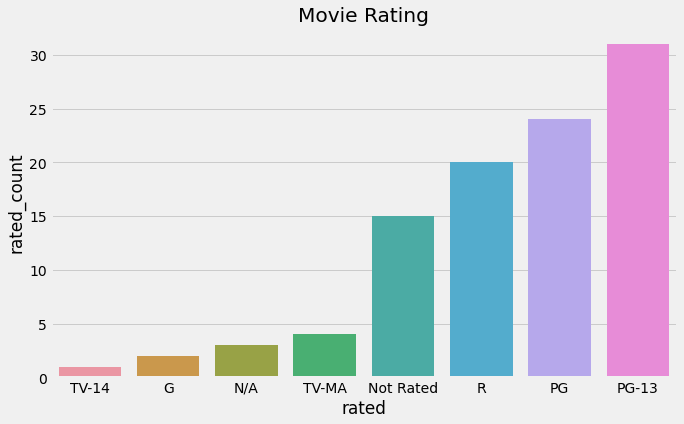

In [197]:
plt.figure(figsize=(10,6))
sns.barplot(data=rated_count, x="rated", y="rated_count")
plt.title("Movie Rating")
plt.show()

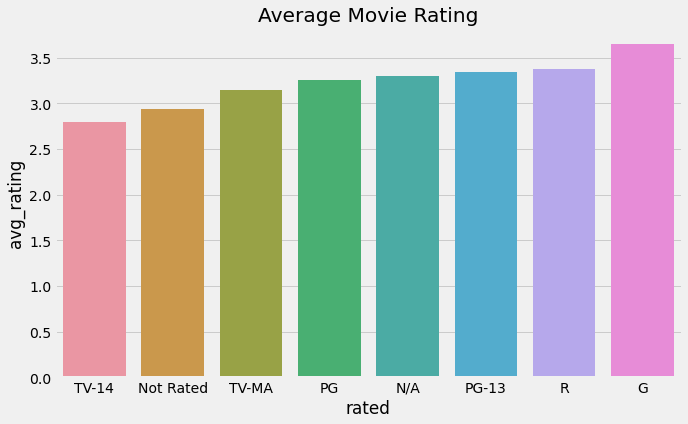

In [199]:
data2 = rated_count.sort_values(by="avg_rating")

plt.figure(figsize=(10,6))
sns.barplot(data=data2, x="rated", y="avg_rating")
plt.title("Average Movie Rating")
plt.show()